# Overview Goal/Objective
```
  Arief Luqmannurhakim ---- Btach 001
          FTDS  ---- Graded Challenge P0W1
```

> Pokemon data explorer

> analyze pokemon monster abilities

> find insight and useful information

> Summary

# Downloading Dataset

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nelrickeine","key":"0f603eceb6345956a665633e2947a56f"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           8932  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5475  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1967  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2369  
promptcloud/careerbuilder-job-listing-2020                    Ca

In [7]:
!kaggle datasets download -d abcsds/pokemon --unzip

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 24.1MB/s]


# Explore Pokemon data
> Querying

In [110]:
import numpy as np
import pandas as pd

In [111]:
df_pokemon = pd.read_csv('Pokemon.csv')
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [112]:
df_pokemon.info() # general information for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [113]:
df_pokemon.loc[:, 'Total':'Speed'].describe() # summary of numeric value's mean, min , std , etc

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [114]:
df_pokemon.loc[df_pokemon['Attack'] > 50]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [115]:
df_pokemon.loc[(df_pokemon['Attack'] > 50) & (df_pokemon['Legendary'] == True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Display all missing value and handling it
> fill missing value with same element in type 1 column
>
> to indicate pokemon only has 1 type element (since second element were missing)

In [116]:
df_pokemon[df_pokemon.isna().any(axis=1)] # print all missing value

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [117]:
df_pokemon.isna().sum() # sum of missing value

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [118]:
df_pokemon['Type 2'].fillna(df_pokemon['Type 1'], inplace=True) # fill all missing value with type 2 columns

In [119]:
df_pokemon.isna().sum() # check if missing value already gone or replaced

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

# Create new column 

> pokemon monster with 2 type of different element
> 
> Calculate average damage by querying data/element


In [120]:
df_pokemon['isDouble Type'] = df_pokemon[['Type 1', 'Type 2']].apply(lambda x : 'Yes' if x['Type 1'] != x['Type 2'] else 'No', axis=1)

In [121]:
df_pokemon['avg_dps'] =  df_pokemon[['Attack', 'Sp. Atk']].mean(axis=1)

In [122]:
df_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,isDouble Type,avg_dps
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Yes,57.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Yes,71.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Yes,91.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Yes,111.0
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False,No,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Yes,100.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Yes,160.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Yes,130.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Yes,165.0


# Groupby
> isDouble Element
>
> Legendary pokemon
>
> Generation
>
> Element

In [123]:
df_pokemon.groupby(['isDouble Type']).first()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,avg_dps
isDouble Type,,,,,,,,,,,,,,
No,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False,56.0
Yes,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,57.0


In [124]:
df_pokemon.groupby(['Legendary']).first()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,isDouble Type,avg_dps
Legendary,,,,,,,,,,,,,,
False,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Yes,57.0
True,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,Yes,90.0


In [125]:
df_pokemon.groupby([ 'Generation' ]).first()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,isDouble Type,avg_dps
Generation,,,,,,,,,,,,,,
1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,Yes,57.0
2,152,Chikorita,Grass,Grass,318,45,49,65,49,65,45,False,No,49.0
3,252,Treecko,Grass,Grass,310,40,45,35,65,55,70,False,No,55.0
4,387,Turtwig,Grass,Grass,318,55,68,64,45,55,31,False,No,56.5
5,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,True,Yes,100.0
6,650,Chespin,Grass,Grass,313,56,61,65,48,45,38,False,No,54.5


In [126]:
df_pokemon.groupby(['Type 1', 'Type 2']).first()

#        Name  Total  ...  Legendary  isDouble Type  avg_dps
Type 1 Type 2                            ...                                   
Bug    Bug        10    Caterpie    195  ...      False             No     25.0
       Electric  595      Joltik    319  ...      False            Yes     52.0
       Fighting  214   Heracross    500  ...      False            Yes     82.5
       Fire      636    Larvesta    360  ...      False            Yes     67.5
       Flying     12  Butterfree    395  ...      False            Yes     67.5
...              ...         ...    ...  ...        ...            ...      ...
Water  Poison     72   Tentacool    335  ...      False            Yes     45.0
       Psychic    79    Slowpoke    315  ...      False            Yes     52.5
       Rock      222     Corsola    380  ...      False            Yes     60.0
       Steel     395    Empoleon    530  ...      False            Yes     98.5
       Water       7    Squirtle    314  ...      False             No     49.0

[154 rows x 13 columns]

In [127]:
for name, group in df_pokemon.groupby(['isDouble Type', 'Generation']): # extract each group (optional)
  print(pd.DataFrame(group))

       #                 Name   Type 1  ... Legendary  isDouble Type  avg_dps
4      4           Charmander     Fire  ...     False             No     56.0
5      5           Charmeleon     Fire  ...     False             No     72.0
9      7             Squirtle    Water  ...     False             No     49.0
10     8            Wartortle    Water  ...     False             No     64.0
11     9            Blastoise    Water  ...     False             No     84.0
..   ...                  ...      ...  ...       ...            ...      ...
159  147              Dratini   Dragon  ...     False             No     57.0
160  148            Dragonair   Dragon  ...     False             No     77.0
162  150               Mewtwo  Psychic  ...      True             No    132.0
164  150  MewtwoMega Mewtwo Y  Psychic  ...      True             No    172.0
165  151                  Mew  Psychic  ...     False             No    100.0

[88 rows x 15 columns]
       #        Name    Type 1  ... Lege

# Rename Columns

In [128]:
df_pokemon.rename(columns={'Type 1':'Element 1', 'Type 2': 'Element 2'}, inplace=True) # rename column


In [129]:
df_pokemon

,#,Name,Element 1,Element 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,isDouble Type,avg_dps
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Yes,57.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Yes,71.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Yes,91.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Yes,111.0
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False,No,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Yes,100.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Yes,160.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Yes,130.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Yes,165.0


# Plotting with pandas and seaborn

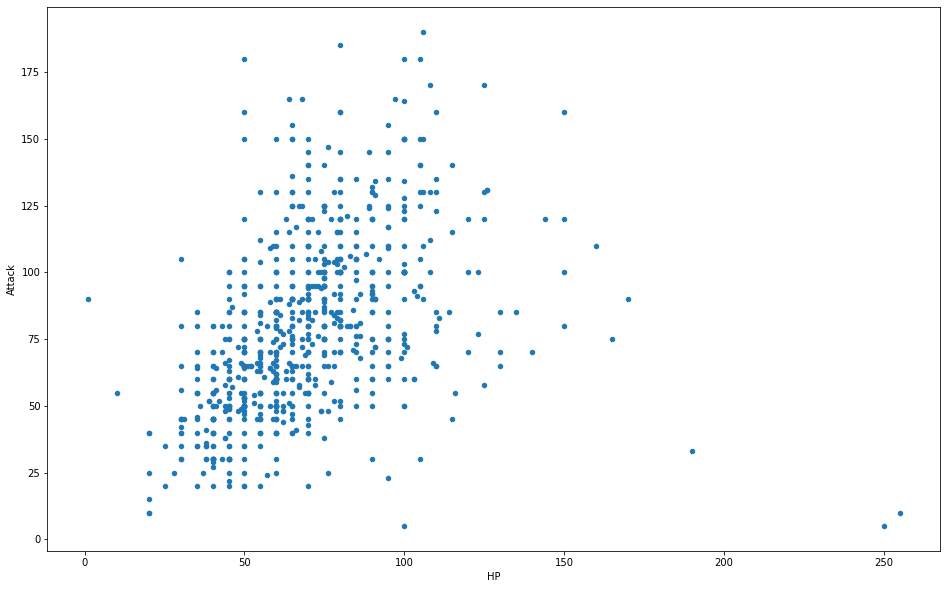

In [130]:
import matplotlib.pyplot as plt
df_pokemon.plot.scatter(x='HP', y='Attack', stacked=True, figsize=(16, 10))
plt.show()

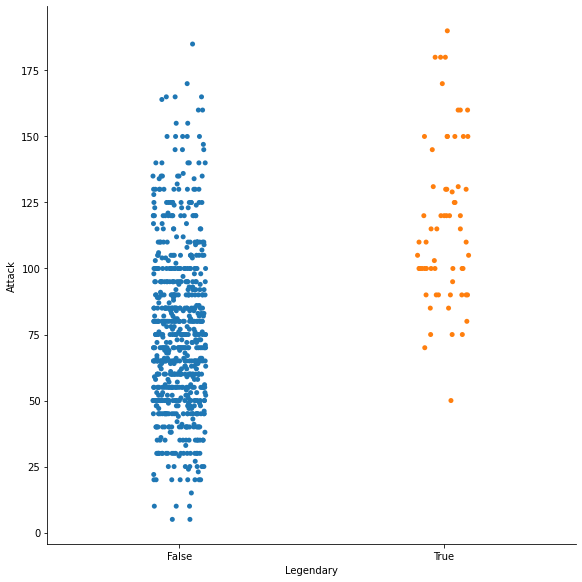

In [131]:
import seaborn as sns
sns.catplot(x='Legendary', y='Attack', data=df_pokemon, height=8, aspect=1)
plt.show()

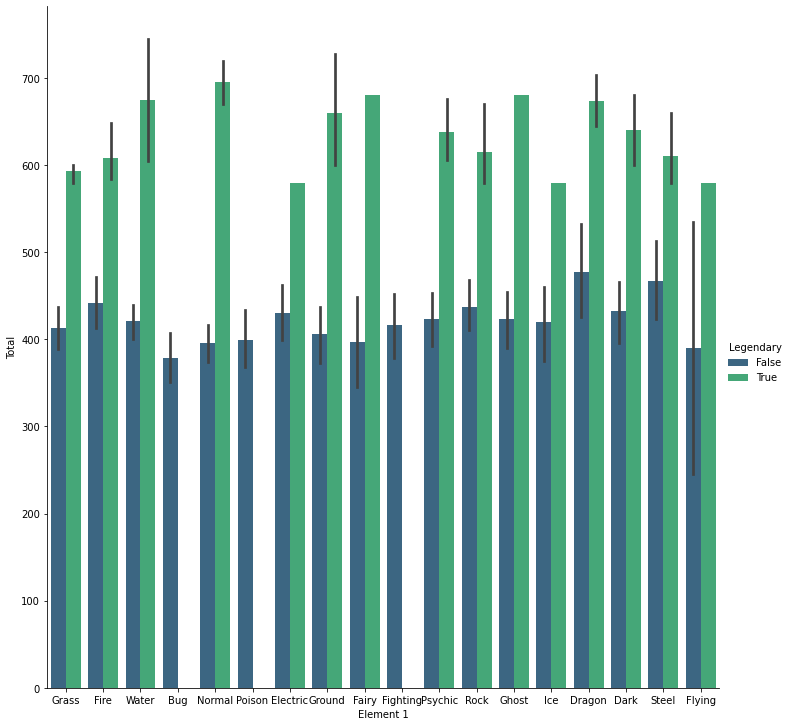

In [132]:
sns.catplot(x='Element 1', y='Total', kind='bar', hue='Legendary', data=df_pokemon, height=10, aspect=1, palette="viridis")
plt.show()

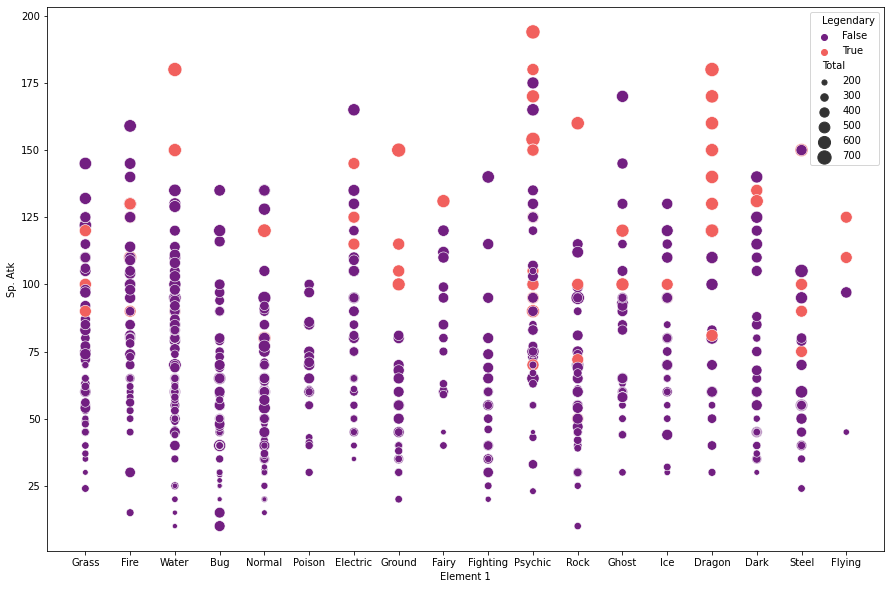

In [133]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='Element 1', y='Sp. Atk', hue='Legendary', data=df_pokemon, size='Total', sizes=(20, 200), ax=ax, palette="magma")
plt.show()

# Summary

Dari data pokemon yang telah di lihat, dan explore
> Pokemon dengan class legendary memiliki nilai Attack yang sangat besar

>Sedikit sekali pokemon dengan HP dan Attack yang tinggi

> Pokemon dengan type element Bug paling sedikit

> Element Psychic memiliki special attack paling besar khususnya class legendary